# 모폴로지 처리

형태학적 처리란?  

    특정한 모양의 형태소(stricuring element)를 영상에 적용하여 출력 영상을 생성하는 연산  
 
1. 형태학적 필터링
2. 잡음 제거
3. 세션화
4. 골격화  

어떻게 주변 잡음을 제거할 것이며 안에 채워지지 않은 곳을 채울 것인가  

영상을 침식시키다보면 골격이 나온다.  




## 침식과 팽창 연산

필터링과 유사하지만 더 간단한 방법을 사용한다.  

주변 정보와 형태소를 마스킹 시키는 방식이다.  



### 침식 연산

- 입력 화소와 형태소를 침식연산했을 때 _하나라도 일치하지 않으면_ 출력화소가 0이 된다.  


- 입력 화소와 형태소를 침식연산했을 때 _전부 일치한다면_ 출력화소가 1이 된다.  


- 내 주변의 모든 애들이 값이 있는가를 따진다는 것  



`erode(src, dst, kernel)`  


### 팽창 연산

- 입력 화소와 형태소를 팽창연산했을 때 _모두 불일치하면_ 출력화소가 0이된다.  


- 입력 화소와 형태소를 팽창연산했을 때 _하나라도 일치하면_ 출력화소가 1이 된다.  

- ANDOR 라고 생각하면 됨.  

없던 점들이 생성되는 것을 볼 수 있음   

틈새가 매꿔진다고 생각할 수 있다. -> 두 오브젝트가 나뉘었을 경우 그것을 매꿀 수 있는 방법이기도 함  




`dialte(src,  `  



`getStructuringElement(int shape, Size ksize, Point anchor=Point(-1, -1))`  

shape
- 사각형 상자: MORPH_RECT  
- 십자가: MORPH_CROSS  
- 타원형: MORPH_  



침식과 팽창은 바이너리 영상에서 진행한다.  


In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 5]


def imshow(tit, images):
    plt.title(tit)
    if len(images.shape) == 3:
        plt.imshow(cv2.cvtColor(images, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(images, cmap='gray')
    plt.show()

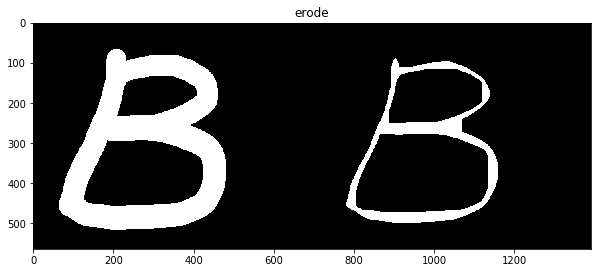

In [8]:
src = cv2.imread('img/letterb.png', cv2.IMREAD_GRAYSCALE)

_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# 침식
dst1 = cv2.erode(src_bin, None)
for i in range(15):
    dst1 = cv2.erode(dst1, None)
imshow("erode", np.hstack((src_bin,dst1)))


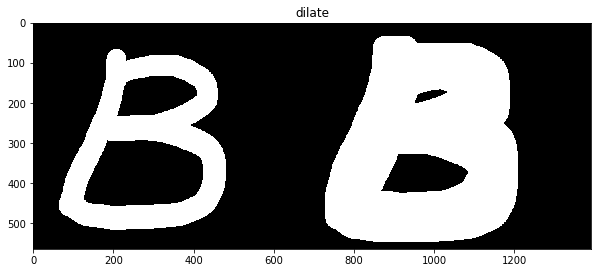

In [11]:
# 팽창
dst2 = cv2.dilate(src_bin, None)
for i in range(30):
    dst2 = cv2.dilate(dst2, None)
imshow("dilate", np.hstack((src_bin, dst2)))

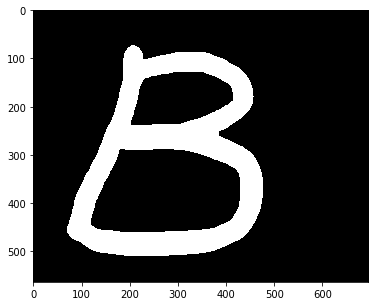

In [12]:
dst1 = cv2.erode(src_bin, None, iterations=5) # 반복을 지정해 줄 수 있다.
imshow("", dst1)

In [18]:
# 7 x 7 십자가 커널 생성
cross_kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (7, 7))
print(kernel)
# 7 x 7 box 형 커널 생성
box_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
print(kernel)

[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]
[[1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1]]


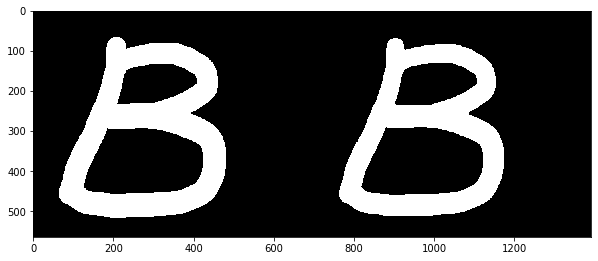

In [20]:
# cross 커널 넣어서 실행
dst1 = cv2.erode(src_bin, cross_kernel, iterations=1) # 반복을 지정해 줄 수 있다.
imshow("", np.hstack((src_bin, dst1)))

### 열림 연산

    열림 연산 opening은 침식 연산 다음에 팽창 연산이 이어지는 것  
    
`dst = open(src, element) = dilate(erode(sec, element))`  

기본적으로 주변 잡음을 제거하면서 원래 크기(특성)는 거의 유지함.  



### 닫힘 연산

    닫힘 연산은 제거 연산의 반대가 된다. 즉 먼저 팽창 연산 다음에 침식 연산이 행해진다.  
    
`dst = close(src, element) = erode(dilate(src, element))`  

원래 크기와 대략적으로 유사하지만 흩어져있던 것들을 뭉치는 효과가 있다.  

홀을 채우면서 원래 모양을 유지함  

팽창 연산으로 빈 공간을 매꿔주고 침식 연산을 통해 사이즈를 원래 수준으로 돌린다.  



노이즈가 끼어있을 때 이진화 하기 어려운 것을 Open, Close을 통해 자잘한 것들을 제거할 수 있다.  


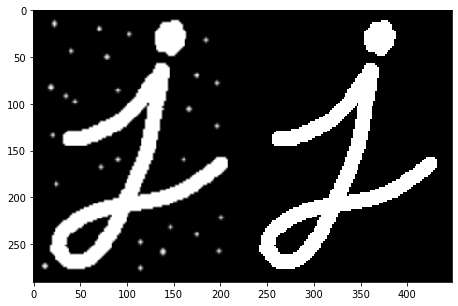

In [27]:
# 열림 연산
src = cv2.imread('img/open.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

box_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, box_kernel)

imshow("", np.hstack((src, dst1)))

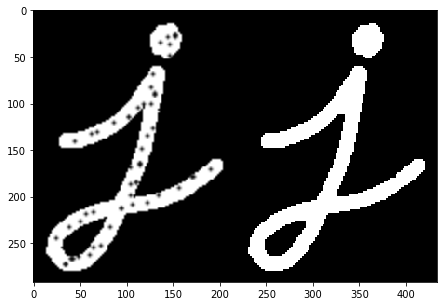

In [28]:
# 닫힘 연산
src = cv2.imread('img/close.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

box_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))

dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_CLOSE, box_kernel)

imshow("", np.hstack((src, dst1)))

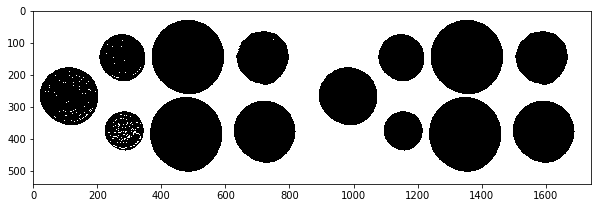

In [37]:
src = cv2.imread('img/coins.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

box_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
# coins 사진이 반전되어있기 떄문에 OPEN으로 하거나 255에서 src_bin을 빼주거나 한다
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, box_kernel)
imshow("", np.hstack((src_bin, dst1)))

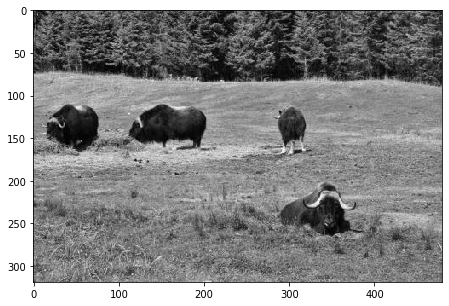

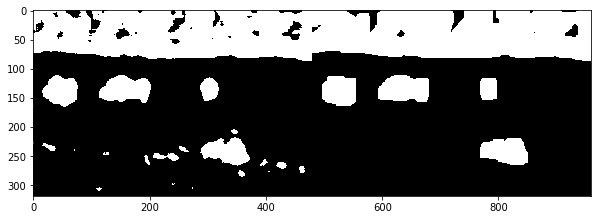

In [117]:
# 소의 개수를 셀수 있을까
src = cv2.imread('img/cow.jpg', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
src_bin = 255 - src_bin
box_kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS, (7, 7))
box_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,8))

src_bin = cv2.medianBlur(src_bin, 11)


# coins 사진이 반전되어있기 떄문에 OPEN으로 하거나 255에서 src_bin을 빼주거나 한다
# dst1 = cv2.dilate(src_bin, None)
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, box_kernel1, iterations=3)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_DILATE, None, iterations=8)




# dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_OPEN, box_kernel1, iterations=10)
imshow("", src)
imshow("", np.hstack((src_bin, dst1)))

AttributeError: 'NoneType' object has no attribute 'shape'

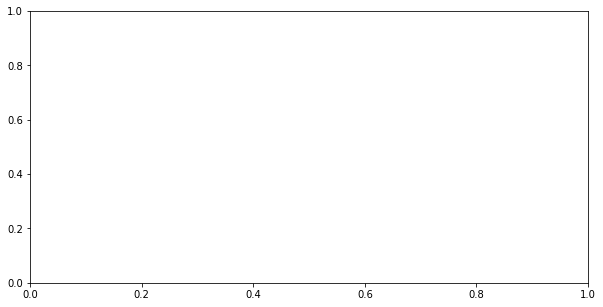

In [118]:
contours, hierarchy = cv2.findContours(dst1,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)

src = cv2.imread('cow.jpg')

for contour in contours:
    if cv2.contourArea(contour) > 1000 and cv2.contourArea(contour) < 4000:
        hull = cv2.convexHull(contour)
        cv2.drawContours(src, [hull], 0,(0,0,255), 3)
        
imshow("", src)

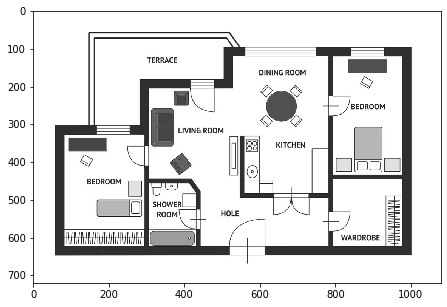

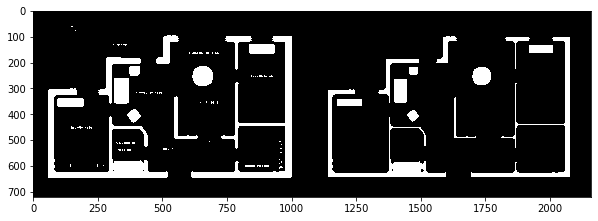

In [156]:
# 도면을 이진화
src = cv2.imread('img/draw.png', cv2.IMREAD_GRAYSCALE)
_, src_bin = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
src_bin = 255 - src_bin
src_bin = cv2.medianBlur(src_bin, 11)
box_kernel1 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
dst1 = cv2.morphologyEx(src_bin, cv2.MORPH_ERODE, box_kernel1, iterations=2)
dst1 = cv2.morphologyEx(dst1, cv2.MORPH_CLOSE, None)
imshow("", src)
imshow("", np.hstack((src_bin, dst1)))

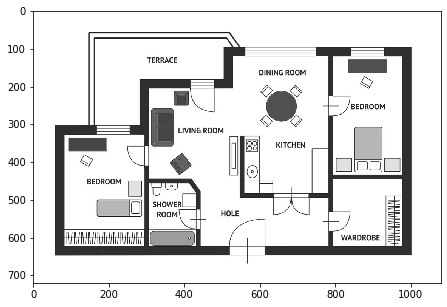

(720, 1080)
(720, 1080)


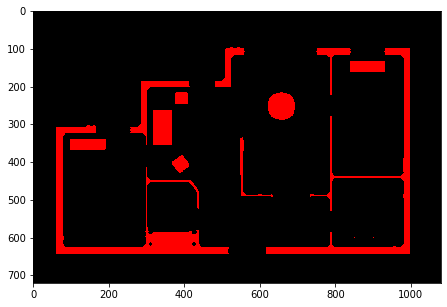

In [150]:
src = cv2.imread('img/draw.png',0)
imshow("", src)
print(src.shape)
print(dst1.shape)
col = np.zeros((dst1.shape[0], dst1.shape[1], 3), dtype="uint8")


col[:,:,2] = dst1
# hsv = cv2.cvtColor(dst1, cv2.COLOR_GRAY2BGR) # HSV Chanel로 변경
# hsv = cv2.cvtColor(dst1, cv2.COLOR_BGR2HSV) # HSV Chanel로 변경

# dst1[:,:,0]
# bit_and = cv2.bitwise_xor(src, dst1)

imshow("", col)


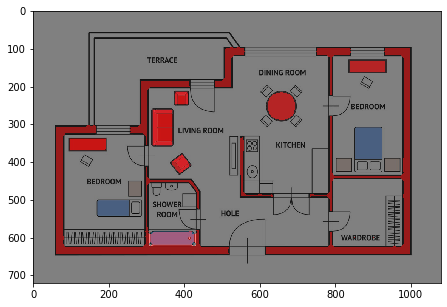

In [152]:
src = cv2.imread('img/draw.png')

dst2 = cv2.addWeighted(src, 0.5, col, 0.5, 0.0)
imshow("", dst2)
